In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [3]:
relationship_df = pd.read_csv((r"C:\Users\ryani\Desktop\JupyterLab\20th_century\country_relationship.csv") , index_col = 0)

In [4]:
relationship_df

,source,target,value
0,France,UK,18
1,France,Russia,6
2,Germany,Russia,21
3,Germany,Italy,22
4,Germany,USA,34
...,...,...,...
85,Greece,Italy,3
86,Italy,Japan,6
87,Romania,Russia,6
88,India,Lebanon,2


In [5]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

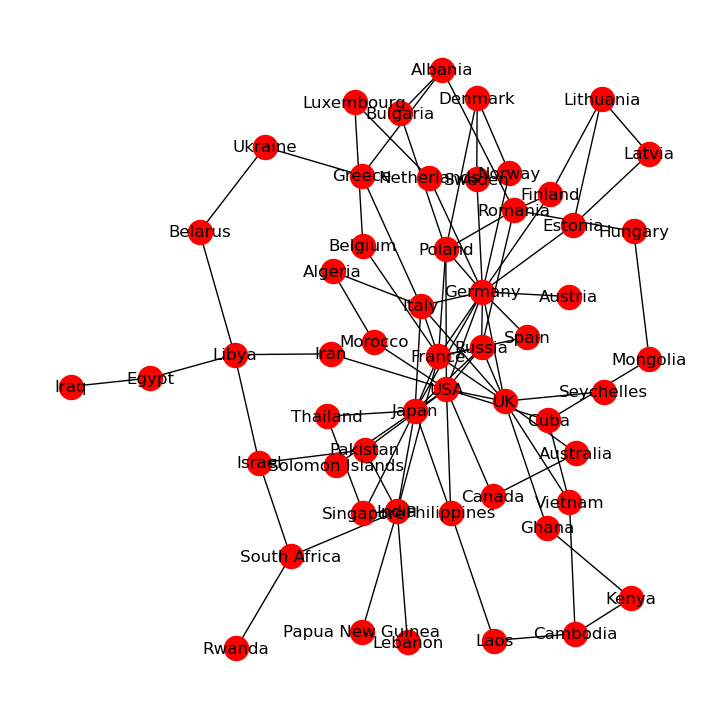

In [6]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [7]:
h.savefig('networkx_plt_20th_countries.png')

#### Graph visualization - Pyvis

In [8]:

net = Network(notebook=True, width="900px", height="800px", bgcolor='#222222', font_color='white')
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_=True)
net.repulsion()
net.show("20th_country_network.html")

20th_country_network.html


#### Community detection - Leiden algorithm

In [10]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'infomap', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [12]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [13]:
new_com = coms.to_node_community_map()

In [14]:
new_com

defaultdict(list,
            {'UK': [0],
             'Russia': [0],
             'USA': [0],
             'Philippines': [0],
             'Laos': [0],
             'Cambodia': [0],
             'Kenya': [0],
             'Ghana': [0],
             'Seychelles': [0],
             'Cuba': [0],
             'Canada': [0],
             'Australia': [0],
             'Vietnam': [0],
             'Japan': [1],
             'Thailand': [1],
             'Singapore': [1],
             'Solomon Islands': [1],
             'India': [1],
             'Pakistan': [1],
             'Israel': [1],
             'South Africa': [1],
             'Papua New Guinea': [1],
             'Rwanda': [1],
             'Lebanon': [1],
             'France': [2],
             'Germany': [2],
             'Austria': [2],
             'Spain': [2],
             'Poland': [2],
             'Denmark': [2],
             'Norway': [2],
             'Sweden': [2],
             'Netherlands': [2],
             'Luxe

In [15]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [18]:
dict_com

{'UK': 0,
 'Russia': 0,
 'USA': 0,
 'Philippines': 0,
 'Laos': 0,
 'Cambodia': 0,
 'Kenya': 0,
 'Ghana': 0,
 'Seychelles': 0,
 'Cuba': 0,
 'Canada': 0,
 'Australia': 0,
 'Vietnam': 0,
 'Japan': 1,
 'Thailand': 1,
 'Singapore': 1,
 'Solomon Islands': 1,
 'India': 1,
 'Pakistan': 1,
 'Israel': 1,
 'South Africa': 1,
 'Papua New Guinea': 1,
 'Rwanda': 1,
 'Lebanon': 1,
 'France': 2,
 'Germany': 2,
 'Austria': 2,
 'Spain': 2,
 'Poland': 2,
 'Denmark': 2,
 'Norway': 2,
 'Sweden': 2,
 'Netherlands': 2,
 'Luxembourg': 2,
 'Belgium': 2,
 'Estonia': 3,
 'Latvia': 3,
 'Lithuania': 3,
 'Finland': 3,
 'Romania': 3,
 'Hungary': 3,
 'Mongolia': 3,
 'Ukraine': 4,
 'Belarus': 4,
 'Libya': 4,
 'Egypt': 4,
 'Iraq': 4,
 'Iran': 4,
 'Italy': 5,
 'Albania': 5,
 'Greece': 5,
 'Morocco': 5,
 'Algeria': 5,
 'Bulgaria': 5}

In [19]:
# Assign community group attribute and visualize with pyvis

# Ensure dict_com is defined
dict_com = {k: v[0] for k, v in new_com.items()}

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook=True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_=True)
com_net.repulsion()
com_net.show("20th_countries_communities_leiden.html")

20th_countries_communities_leiden.html


## Yes this seems to be sensible. Countries are associated with other countries in which they have history/ war/ colonisation/ geographical location. UK, Germany, Japan, France, USA are all quite central nodes which have a large amount of connections. 

### The most important countries in 20th Century Events

In [20]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.16981132075471697,
 'UK': 0.16981132075471697,
 'Russia': 0.11320754716981132,
 'Germany': 0.2641509433962264,
 'Italy': 0.11320754716981132,
 'USA': 0.20754716981132074,
 'Austria': 0.018867924528301886,
 'Spain': 0.03773584905660377,
 'Poland': 0.11320754716981132,
 'Estonia': 0.05660377358490566,
 'Latvia': 0.03773584905660377,
 'Lithuania': 0.05660377358490566,
 'Finland': 0.05660377358490566,
 'Denmark': 0.05660377358490566,
 'Norway': 0.03773584905660377,
 'Sweden': 0.03773584905660377,
 'Netherlands': 0.03773584905660377,
 'Luxembourg': 0.03773584905660377,
 'Belgium': 0.03773584905660377,
 'Albania': 0.05660377358490566,
 'Greece': 0.05660377358490566,
 'Ukraine': 0.03773584905660377,
 'Belarus': 0.03773584905660377,
 'Libya': 0.07547169811320754,
 'Egypt': 0.03773584905660377,
 'Iraq': 0.018867924528301886,
 'Japan': 0.18867924528301885,
 'Morocco': 0.03773584905660377,
 'Algeria': 0.03773584905660377,
 'Thailand': 0.03773584905660377,
 'Singapore': 0.056603773584

In [22]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [23]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

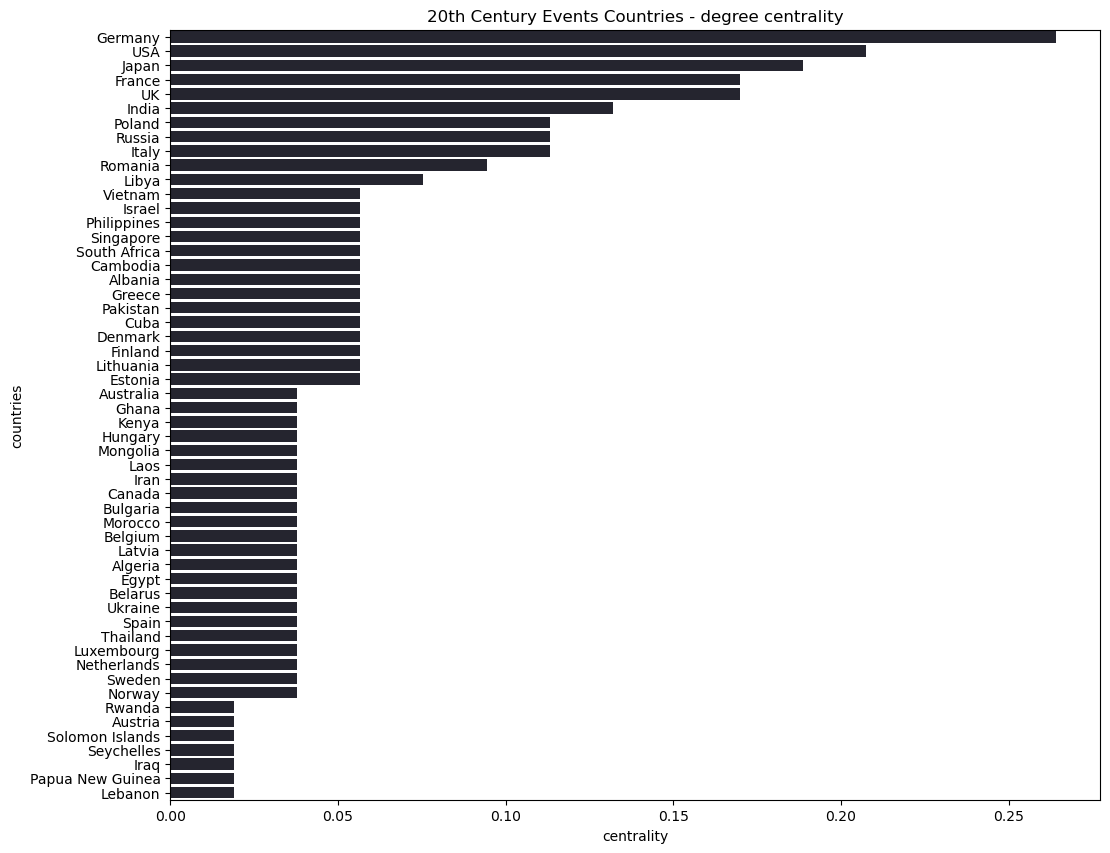

In [45]:
# Plot the degree centrality

plt.figure(figsize = (12, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century Events Countries - degree centrality")

## From this graph I see that Germany has the most connections with other countries. Perhaps due to is invasion of a large amount of them. A similar story appears with USA and Japan.

In [27]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [28]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

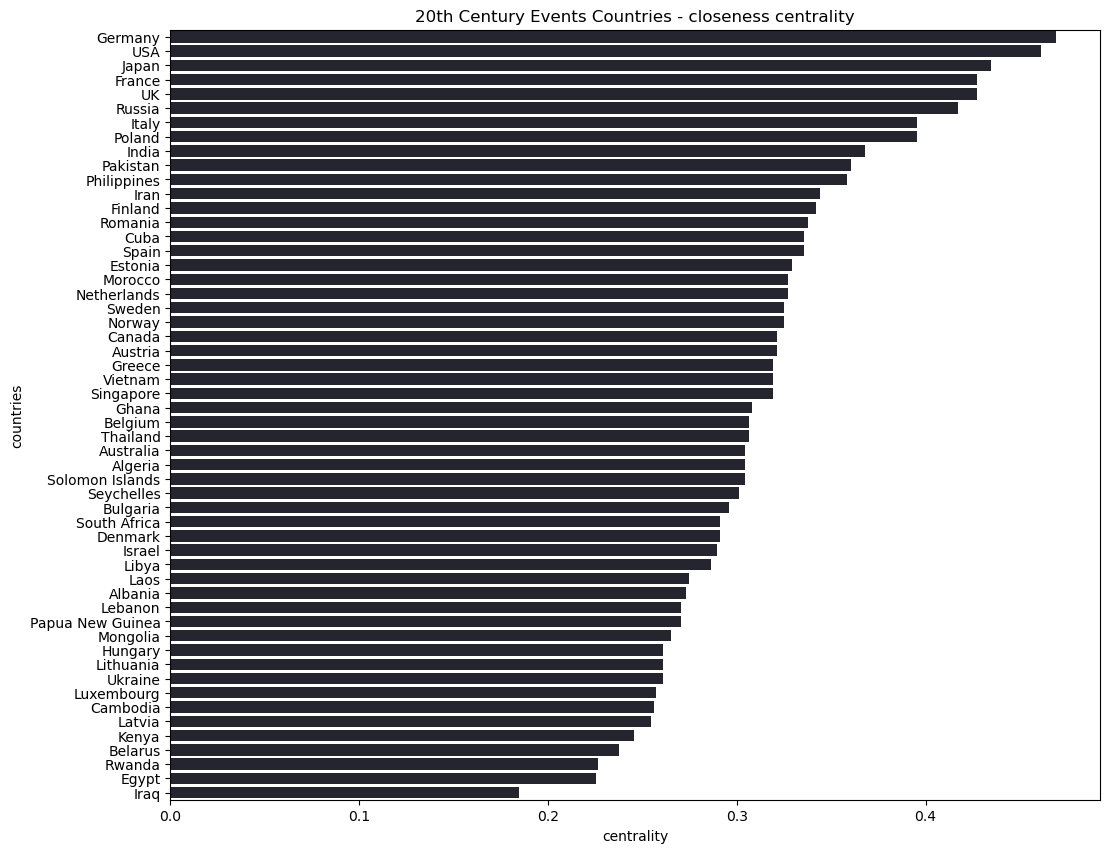

In [30]:
plt.figure(figsize = (12, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century Events Countries - closeness centrality")

## From this graph I see that my visual conclusion about the countries with the most nodes was fairly accurate. 

In [31]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [32]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

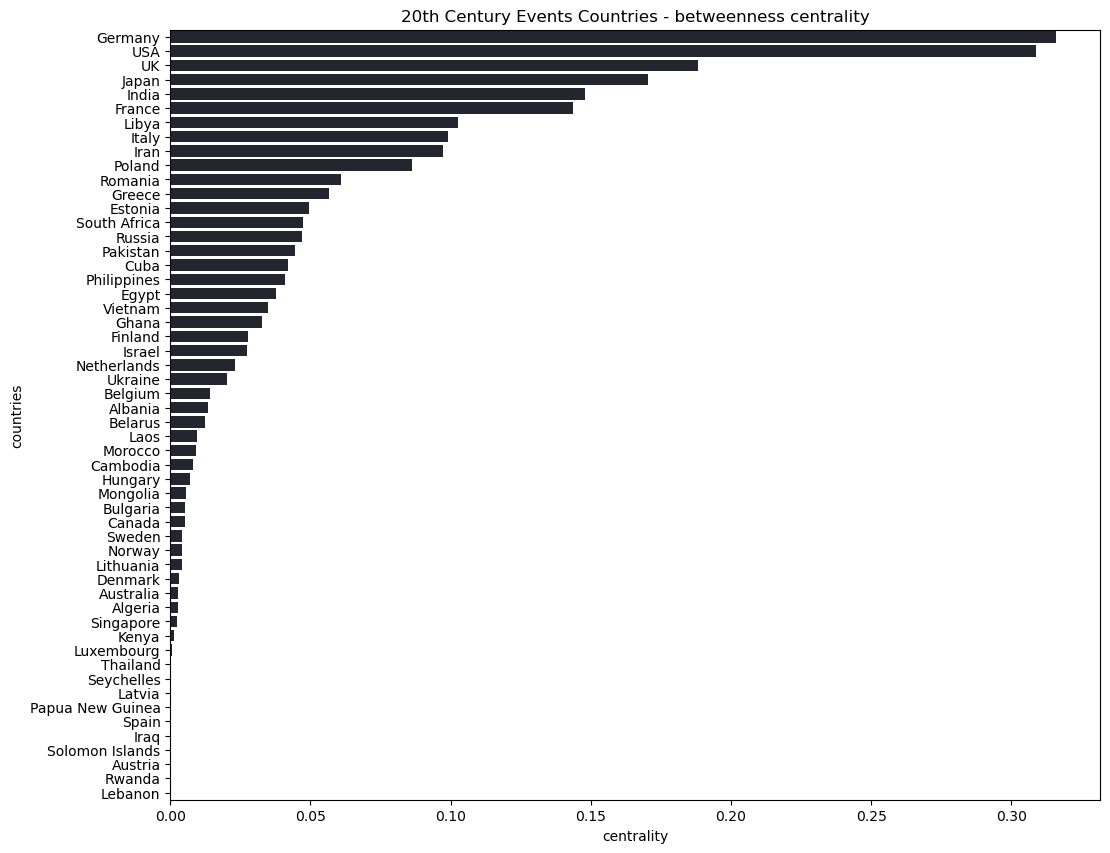

In [34]:
plt.figure(figsize = (12, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century Events Countries - betweenness centrality")

## It seems that many countries are linked to each other through Germany, which is again perhaps due to its role in WWII. The most influential country in the 20th century was Germany, followed by the USA, UK, and Japan. 

In [35]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')